In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import tensorflow as tf
import pickle
import os

In [2]:
import dataset_utils
from glob import glob

In [3]:
DATA_DIR = "2_class_data"
NUM_POINTS = 100
NUM_CLASSES = 2
BATCH_SIZE = 32
train_points, test_points, train_labels, test_labels, CLASS_MAP = dataset_utils.parse_dataset(NUM_POINTS, DATA_DIR)

processing class: standing
processing class: sitting


In [4]:
print(train_points)

[[[ 3.074e-01  4.294e-01  6.670e-01  6.260e-01  2.710e+02]
  [ 6.250e-01  4.580e-01  2.725e-01 -3.757e-01  2.800e+02]
  [ 2.708e-01  1.000e+00  3.950e-01 -8.765e-01  3.040e+02]
  ...
  [ 4.446e-01  1.000e+00  6.484e-01  7.515e-01  3.570e+02]
  [ 2.603e-01  4.956e-01  9.683e-01  6.260e-01  3.520e+02]
  [ 9.106e-01  7.539e-01  7.529e-01  5.010e-01  3.310e+02]]

 [[ 3.599e-01  7.896e-01  8.989e-01  7.515e-01  2.960e+02]
  [ 3.359e-01  3.226e-02  2.702e-02  3.757e-01  2.460e+02]
  [ 2.603e-01  4.956e-01  9.683e-01  6.260e-01  3.520e+02]
  ...
  [ 2.345e-01  9.570e-01  3.638e-01  3.757e-01  2.800e+02]
  [ 5.898e-01  8.022e-01  7.068e-02 -3.757e-01  2.540e+02]
  [ 8.105e-01  3.962e-01  4.675e-01 -5.010e-01  2.170e+02]]

 [[ 6.685e-01  4.138e-01  8.750e-01 -5.010e-01  2.750e+02]
  [ 7.725e-01  3.000e-01  2.455e-01 -2.505e-01  1.880e+02]
  [ 3.159e-01  6.216e-01  9.429e-01  6.260e-01  3.640e+02]
  ...
  [ 1.978e-01  8.804e-01  2.263e-01  5.010e-01  2.630e+02]
  [ 8.994e-01  7.134e-01  2.448e-0

In [5]:
print(test_points)

[[[ 6.8945e-01  7.0898e-01  8.1396e-01  5.0098e-01  2.8800e+02]
  [ 4.6240e-01  1.2732e-01  7.9199e-01  7.5146e-01  3.7000e+02]
  [ 6.0596e-01  3.7769e-01  9.9170e-01 -7.5146e-01  2.2000e+02]
  ...
  [ 1.0000e+00  1.0000e+00  0.0000e+00 -6.2598e-01  2.0200e+02]
  [ 4.4849e-01  1.1328e-01  6.3867e-01 -7.5146e-01  3.3100e+02]
  [ 1.9116e-01  8.3643e-01  5.6934e-01  6.2598e-01  3.5500e+02]]

 [[ 3.0396e-01  4.9292e-01  2.3242e-01  8.7646e-01  2.5700e+02]
  [ 6.8945e-01  7.0898e-01  9.0039e-01  5.0098e-01  2.8800e+02]
  [ 3.8867e-01  5.8789e-01  7.4658e-01  6.2598e-01  3.6300e+02]
  ...
  [ 6.4307e-01  2.4646e-01  5.8496e-01  5.0098e-01  3.0700e+02]
  [ 2.8833e-01  1.0000e+00  2.9248e-01  6.2598e-01  2.6200e+02]
  [ 1.7871e-01  0.0000e+00  1.2769e-01  7.5146e-01  3.5600e+02]]

 [[ 1.5015e-01  5.7812e-01  6.2012e-01  5.0098e-01  4.0600e+02]
  [ 6.7529e-01  1.5820e-01  4.8438e-01 -6.2598e-01  2.2700e+02]
  [ 5.4639e-01  1.3159e-01  6.8555e-01  6.2598e-01  3.4700e+02]
  ...
  [ 2.8760e-01  7.

In [6]:
# train_points = train_points[:, :, :3]
# test_points = test_points[:, :, :3]
print(CLASS_MAP)

{0: 'standing', 1: 'sitting'}


In [7]:
print(train_points)

[[[ 3.074e-01  4.294e-01  6.670e-01  6.260e-01  2.710e+02]
  [ 6.250e-01  4.580e-01  2.725e-01 -3.757e-01  2.800e+02]
  [ 2.708e-01  1.000e+00  3.950e-01 -8.765e-01  3.040e+02]
  ...
  [ 4.446e-01  1.000e+00  6.484e-01  7.515e-01  3.570e+02]
  [ 2.603e-01  4.956e-01  9.683e-01  6.260e-01  3.520e+02]
  [ 9.106e-01  7.539e-01  7.529e-01  5.010e-01  3.310e+02]]

 [[ 3.599e-01  7.896e-01  8.989e-01  7.515e-01  2.960e+02]
  [ 3.359e-01  3.226e-02  2.702e-02  3.757e-01  2.460e+02]
  [ 2.603e-01  4.956e-01  9.683e-01  6.260e-01  3.520e+02]
  ...
  [ 2.345e-01  9.570e-01  3.638e-01  3.757e-01  2.800e+02]
  [ 5.898e-01  8.022e-01  7.068e-02 -3.757e-01  2.540e+02]
  [ 8.105e-01  3.962e-01  4.675e-01 -5.010e-01  2.170e+02]]

 [[ 6.685e-01  4.138e-01  8.750e-01 -5.010e-01  2.750e+02]
  [ 7.725e-01  3.000e-01  2.455e-01 -2.505e-01  1.880e+02]
  [ 3.159e-01  6.216e-01  9.429e-01  6.260e-01  3.640e+02]
  ...
  [ 1.978e-01  8.804e-01  2.263e-01  5.010e-01  2.630e+02]
  [ 8.994e-01  7.134e-01  2.448e-0

In [8]:
from tensorflow import data as tf_data
import keras
import PointNET

keras.utils.set_random_seed(seed=42)

In [9]:
train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(PointNET.augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [10]:
import keras
import tensorflow as tf
from keras import ops
from keras import layers
from PointNET import tnet, conv_bn, dense_bn

In [12]:
inputs = keras.Input(shape=(NUM_POINTS, 5))

x = tnet(inputs, 5)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 5)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 100, 32)   │        192 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 32)   │        128 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 100, 64)   │      2,112 │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 100, 512)  │     33,280 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_7[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 25)        │      3,225 │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 5, 5)      │          0 │ dense_5[0][0]   

 Total params: 750,139 (2.86 MB)

 Trainable params: 744,059 (2.84 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 50.9992 - sparse_categorical_accuracy: 0.6426 - val_loss: 37.5619 - val_sparse_categorical_accuracy: 0.6996
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 36.6340 - sparse_categorical_accuracy: 0.8985 - val_loss: 36.2519 - val_sparse_categorical_accuracy: 0.9283
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 36.4521 - sparse_categorical_accuracy: 0.9320 - val_loss: 36.3037 - val_sparse_categorical_accuracy: 0.9013
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 36.4241 - sparse_categorical_accuracy: 0.9283 - val_loss: 36.1239 - val_sparse_categorical_accuracy: 0.9238
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 36.3076 - sparse_categorical_accuracy: 0.9651 - val_loss: 36.1035 - val_sparse_categorical_accuracy: 0.9238
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 36.3717 - sparse_categorical_accuracy: 0.9370 - val_loss: 35.9244 - val_sparse_categorical_accuracy: 0.968

In [14]:
from matplotlib import pyplot as plt

2024-08-12 13:03:41.578466: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
[[[ 6.572e-01  4.165e-01  5.063e-01 -2.505e-01  1.620e+02]
  [ 4.182e-01  6.187e-01  2.500e-01 -1.252e-01  2.460e+02]
  [ 3.560e-01  9.404e-01  6.045e-01  3.757e-01  2.150e+02]
  ...
  [ 7.583e-01  3.354e-01  5.239e-01 -2.505e-01  2.190e+02]
  [ 0.000e+00  4.924e-01  7.212e-01  5.010e-01  1.670e+02]
  [ 8.643e-01  3.237e-01  4.958e-01 -2.505e-01  3.090e+02]]

 [[ 6.143e-01  4.189e-01  2.147e-01 -5.010e-01  1.950e+02]
  [ 4.060e-01  9.019e-01  5.474e-01 -3.757e-01  1.250e+02]
  [ 2.576e-01  3.857e-01  8.828e-01 -2.505e-01  2.000e+02]
  ...
  [ 3.643e-01  1.000e+00  4.187e-01  2.505e-01  1.150e+02]
  [ 5.000e-01  7.197e-01  5.552e-01  0.000e+00  2.110e+02]
  [ 4.828e-02  3.296e-01  2.124e-01  5.010e-01  2.250e+02]]

 [[ 1.949e-01  4.758e-01  8.389e-01 -7.515e-01  2.890e+02]
  [ 2.883e-01  8.789e-01  0.000e+00  7.515e-01  2.550e+02]
  [ 4.497e-01  3.933e-01  8.174e-01 -7.515e-01  2.320e+02]
  ...
  [ 7.070e-01  8.276e-01  4.861e-01  3.757e-01  1.950e

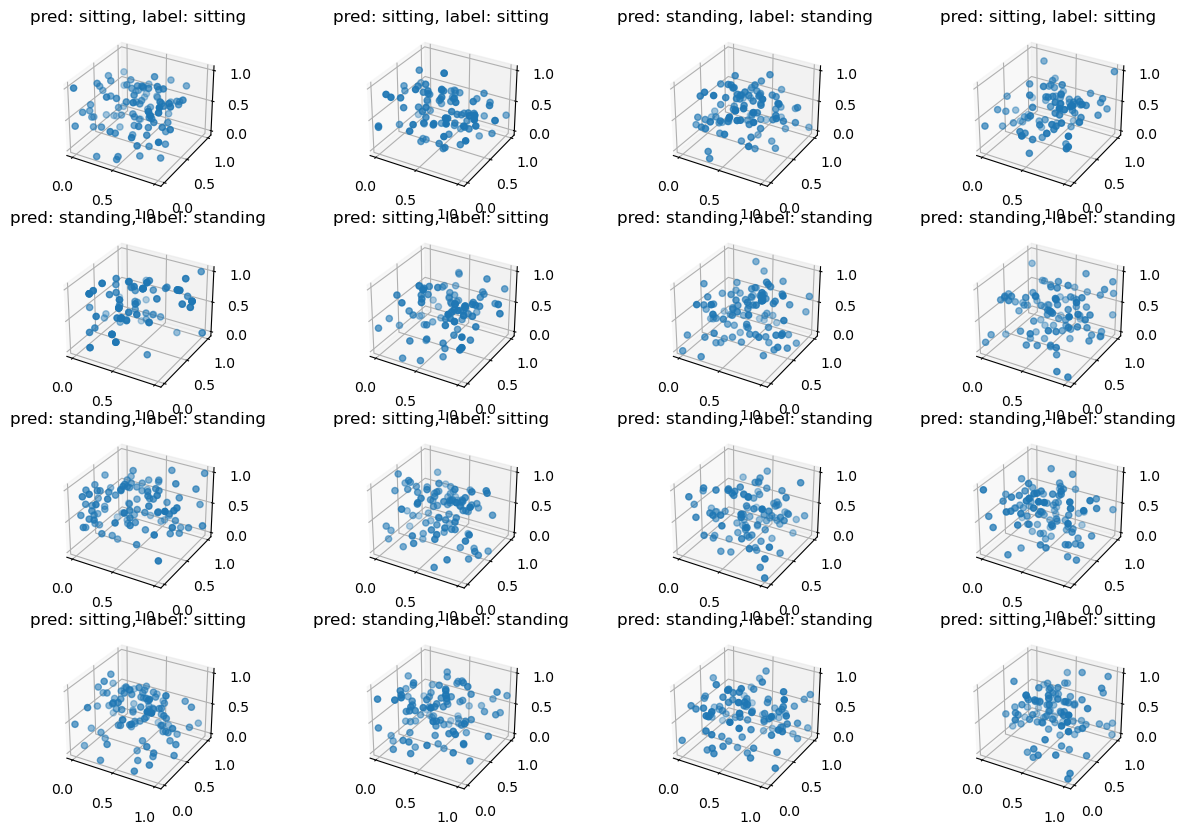

In [15]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:20, ...]
labels = labels[:20, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_on()
plt.show()

In [16]:
predictions = []

for batch in np.array_split(test_points, len(test_points)//NUM_POINTS): 
    preds = model.predict(batch)
    preds = np.argmax(preds, axis=-1)
    predictions.extend(preds)

predictions = np.array(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [17]:
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.29%


In [18]:
model.save('pointnet_2_class_data_5_dims.h5', save_format='h5')
# model.get_config()

NotImplementedError: <PointNET.OrthogonalRegularizer object at 0x3108f52d0> does not implement get_config()